In [2]:
# type your code here
from __future__ import print_function, division
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')
# import train-test split 
from sklearn.model_selection import train_test_split

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import functions to perform feature selection
#from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV 
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Plotting Parameters
plt.rcParams['figure.figsize'] = [15,8]

# THE SPARKS FOUNDATION.
### Data Science & Business Analytics Intern [GRIPMAR21]

In [3]:
### Task-1 >> Prediction Using Supervised ML
#### 1] Find the Optimum Number of Clusters?
#### 2] Representing the Clusters Visually
## KMEANS CLUSTERING
### Used Python Scikit Learn (Sklearn) Library to Build the Kmeans Model
## Source of Data :>> : https://bit.ly/3kXTdox

In [4]:
data = pd.read_csv('~/Documents/DSE - Great Lakes Study/The Sparks Foundation/Task 2/Iris.csv',index_col = 0)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.shape

(150, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [8]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
print(data['Species'].value_counts())

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64


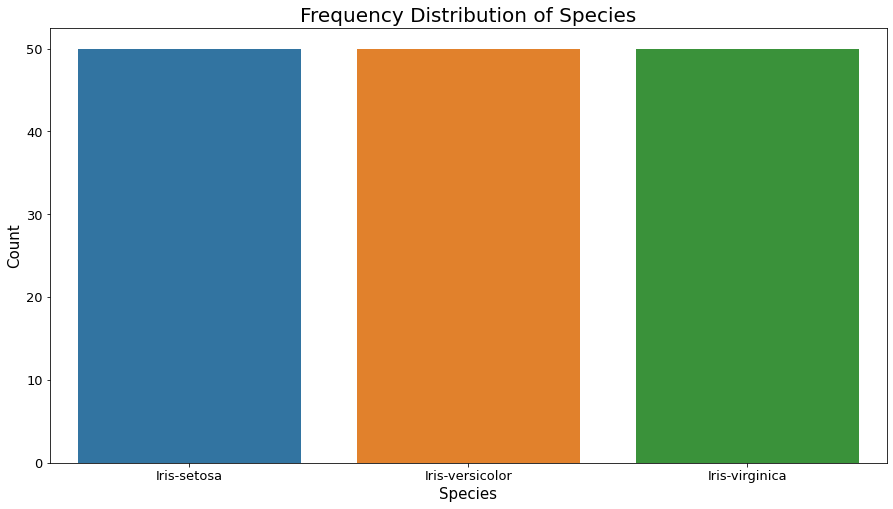

In [10]:
sns.countplot(data['Species'])
plt.title('Frequency Distribution of Species', fontsize = 20)
plt.xlabel('Species', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.xticks(fontsize =13)
plt.yticks(fontsize =13)

plt.show()

In [11]:
print(data.corr())

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


(4.5, -0.5)

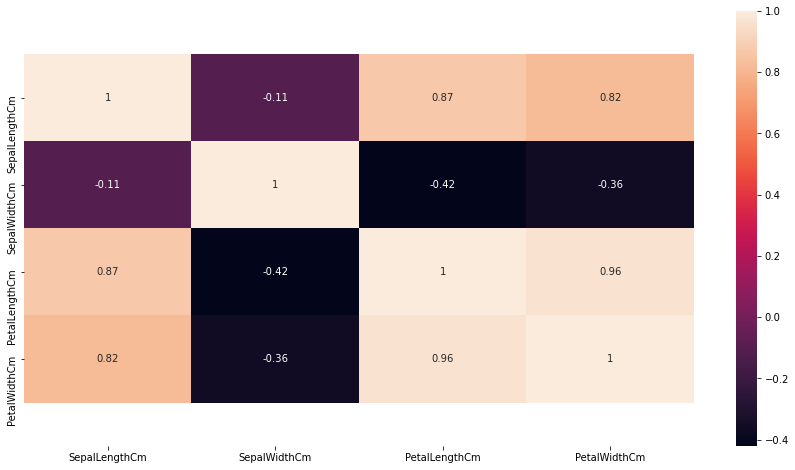

In [12]:
ax = sns.heatmap(data.corr(), annot = True)
bottom,top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top -0.5)

In [13]:
X= data.iloc[:,:-1].values

In [14]:
#now applying the elbow method to find the optimum number of clusters
from sklearn.cluster import KMeans
Within_Cluster_Sum_of_Squares = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(X)
    
    # within cluster sum of squared error values
    Within_Cluster_Sum_of_Squares.append(kmeans.inertia_)

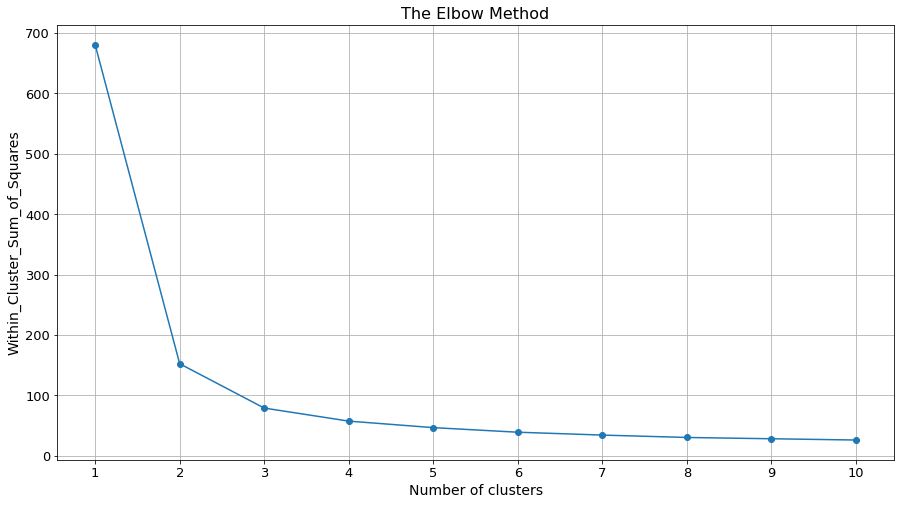

In [15]:
plt.plot(range(1,11), Within_Cluster_Sum_of_Squares, marker = 'o')

plt.title('The Elbow Method', fontsize = 16)
plt.xlabel('Number of clusters', fontsize = 14)
plt.ylabel('Within_Cluster_Sum_of_Squares', fontsize = 14)

plt.xticks(range(1,11),fontsize = 13)
plt.yticks(fontsize = 13)

plt.grid()
plt.show()

#from the above graph we can decide the optimum number of clusters
#we get optimum number of clusters at a point where the 'y coordinate doesn't decrease sigificantly
#hence we can safely choose 3 clusters as optimal number of clusters
#From the Above graph we can clearly see the Elbow formation at 2 and 3, So selecting 3 as optimum Number of Clusters

In [16]:

#now applying the kmeans algorithm to our given dataset
km = KMeans(n_clusters = 3, random_state = 10)
y_kmeans = km.fit_predict(X)
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

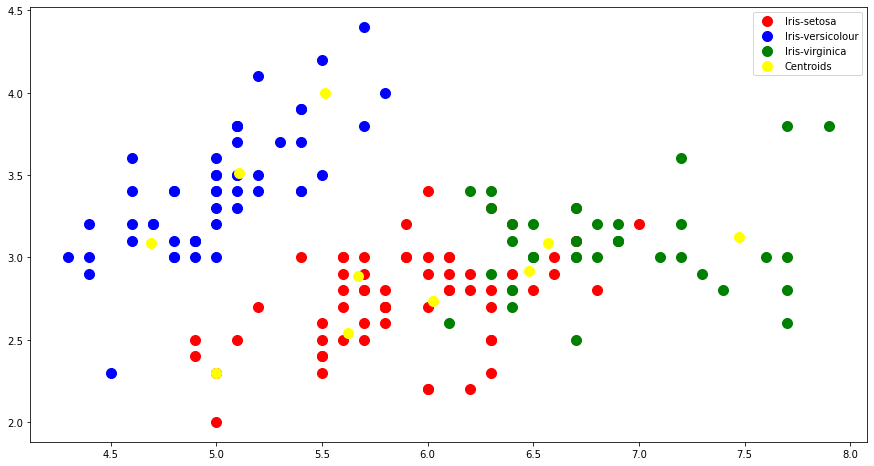

In [17]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

In [18]:

# Number of Iterations performed

km.n_iter_

5

In [19]:

# Adding the predictions to the dataframe  

data1 = data.copy()
data1['Predicted_Species'] = km.labels_

In [20]:
# Function to Plot the clusters 

def cluster_plot(x,y):
    plt.figure(figsize = (12,6))

    for i in range(0,km.n_clusters):
        plt.scatter(x, y, cmap = 'tab10_r', 
                    data= data1[data1['Predicted_Species'] == i],
                    s = 100, label = i)

    if x == 'SepalLengthCm' and y == 'SepalWidthCm':
        a = 0
        b = 1
    else:
        a = 2
        b = 3
    
    plt.scatter(km.cluster_centers_[:, a], km.cluster_centers_[:, b],
                s = 550, c = 'red', marker = '*', label = 'Centeroid')

    plt.title('Predicted Clusters', fontsize = 16)
    plt.xlabel(x, fontsize = 14)
    plt.ylabel(y, fontsize = 14)

    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)

    plt.legend(loc = 0,fontsize = 12)
    plt.show()

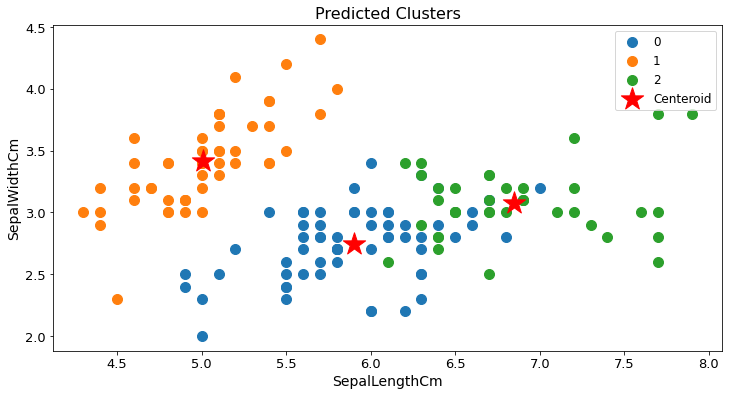

In [21]:
cluster_plot('SepalLengthCm','SepalWidthCm')

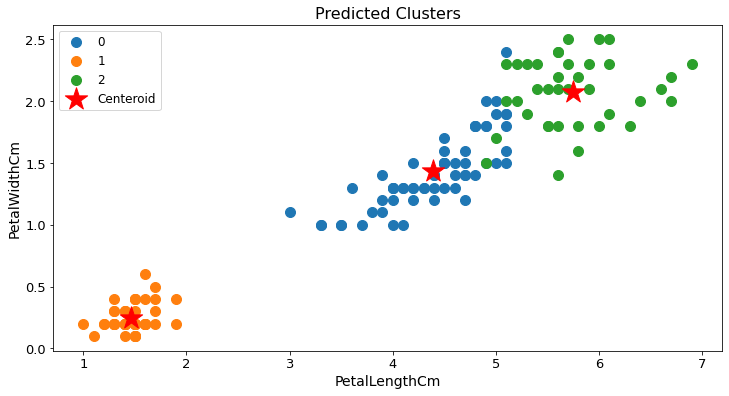

In [22]:
cluster_plot('PetalLengthCm','PetalWidthCm')

0    62
1    50
2    38
Name: Predicted_Species, dtype: int64


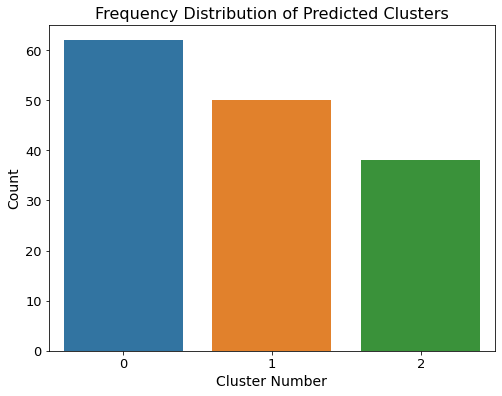

In [23]:
# Frequency Distribution of Predicted Clusters

print(data1['Predicted_Species'].value_counts())

plt.figure(figsize = (8,6))
sns.countplot(data1['Predicted_Species']);
plt.title('Frequency Distribution of Predicted Clusters', fontsize = 16)
plt.xlabel('Cluster Number', fontsize = 14)
plt.ylabel('Count', fontsize = 14)

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.show()

In [24]:
# Finding the Errors

for i in data1['Species'].value_counts().index:
    
    print(i,'\n',data1.loc[data1['Species'] == i]['Predicted_Species'].value_counts(),'\n')

Iris-virginica 
 2    36
0    14
Name: Predicted_Species, dtype: int64 

Iris-versicolor 
 0    48
2     2
Name: Predicted_Species, dtype: int64 

Iris-setosa 
 1    50
Name: Predicted_Species, dtype: int64 



Since we can see that for Iris-versicolor the majority prediction is cluster 0
For Iris-setosa it is cluster 1 while for Iris-virginica it is cluster 2

In [25]:

# Mapping to the cluster number based on majority prediction

data1['Actual_Species'] = data1['Species'].map({'Iris-versicolor':0, 'Iris-setosa':1, 'Iris-virginica':2})
data1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted_Species,Actual_Species
Id,,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,1,1
2,4.9,3.0,1.4,0.2,Iris-setosa,1,1
3,4.7,3.2,1.3,0.2,Iris-setosa,1,1
4,4.6,3.1,1.5,0.2,Iris-setosa,1,1
5,5.0,3.6,1.4,0.2,Iris-setosa,1,1


In [26]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(data1['Actual_Species'], data1['Predicted_Species']),'\n\n')
print('Classification Report\n\n0 -> Iris-versicolor\n1 -> Iris-setosa\n2 -> Iris-virginica\n')
print(classification_report(data1['Actual_Species'], data1['Predicted_Species']))

[[48  0  2]
 [ 0 50  0]
 [14  0 36]] 


Classification Report

0 -> Iris-versicolor
1 -> Iris-setosa
2 -> Iris-virginica

              precision    recall  f1-score   support

           0       0.77      0.96      0.86        50
           1       1.00      1.00      1.00        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150

